In [ ]:
!pip install numpy
!pip install matplotlib

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [152]:
def sigmoid(t):
    return (2 / (1 + math.exp(-t))) - 1


def neuronio_MCP(pesos, entradas):
    uk = np.dot(pesos, entradas)
    return sigmoid(uk)


def feed_forward(rede_xor, vetor_entrada):
    vetor_saida = []

    for ponteiro in rede_xor:

        entrada_com_bias = vetor_entrada + [1]
        saida = [neuronio_MCP(neuronio, entrada_com_bias) for neuronio in ponteiro]

        vetor_saida.append(saida)

        vetor_entrada = saida

    return vetor_saida


def backpropagation(rede_neural, vetor_entrada, vetor_saida, alpha):
    saidas_intermediarias, saidas_neuronios = feed_forward(rede_neural, vetor_entrada)
    deltas_saida = [
        (0.5 * (1 + saida) * (1 - saida)) * (saida - vetor_saida[i]) * alpha
        for i, saida in enumerate(saidas_neuronios)
    ]

    for i, neuronio_saida in enumerate(rede_neural[-1]):
        for j, saida_intermediaria in enumerate(saidas_intermediarias + [1]):
            neuronio_saida[j] -= deltas_saida[i] * saida_intermediaria

    deltas_intermediarios = [
        0.5
        * alpha
        * (1 + saida_intermediaria)
        * (1 - saida_intermediaria)
        * np.dot(deltas_saida, [n[i] for n in rede_neural[-1]])
        for i, saida_intermediaria in enumerate(saidas_intermediarias)
    ]

    for i, neuronio_intermediario in enumerate(rede_neural[0]):
        for j, input in enumerate(vetor_entrada + [1]):
            neuronio_intermediario[j] -= deltas_intermediarios[i] * input


def func1(x):
    # f(x) = sen(x) * sen(2x)
    fn = [math.sin(math.pi / 180 * x) * math.sin(2 * math.pi / 180 * x)]
    return [fn]


def func2(x):
    # f(x) = cos(x) * sen(2x)
    fn = [math.cos(math.pi / 180 * x) * math.sin(2 * math.pi / 180 * x)]
    return [fn]

def func3(x):
    # f(x) = 0.5 * (0.8 + (sen(x) * cos(2x)))
    fn = [0.5 *(0.8 + math.sin(math.pi / 180 * x) * math.cos(2 * math.pi / 180 * x))]
    return [fn]


def predict(entrada_teste):
    return feed_forward(rede_neural, entrada_teste)[-1]


In [153]:
######################## f(x) = sen(x) * sen(2x) ######################## 

In [180]:
random.seed(0)

# Configurações
neuronios_entrada = 1
neuronios_intermediarios = 6
neuronios_saida = 1
alpha = 0.08
qtd_ciclos = 300

In [181]:
# Inicialização dos pesos
camada_oculta = [
    [random.random() for __ in range(neuronios_entrada + 1)]
    for __ in range(neuronios_intermediarios)
]

camada_saida = [
    [random.random() for __ in range(neuronios_intermediarios + 1)]
    for __ in range(neuronios_saida)
]

rede_neural = [camada_oculta, camada_saida]

In [222]:
print("camada intermediária\n", np.array(camada_oculta))
print("camada saída\n", np.array(camada_saida))

camada intermediária
 [[0.82959248 0.71790528]
 [0.54304952 0.14804814]
 [0.58091207 0.31077516]
 [0.80559512 0.19252655]
 [0.54747855 0.47735666]
 [0.90819755 0.26551092]]
camada saída
 [[ 0.47456396  1.47628316  1.21577251  1.29215181  1.22065174  1.83464048
  -1.21473689]]


In [182]:
# Aproximação funcional de f(x) = sen(x)*sen(2x)
# Treinamento
for __ in range(qtd_ciclos):
    for x in range(360):
        entrada = func1(x)
        saida_desejada = func1(x)
        for vetor_entrada, vetor_saida in zip(entrada, saida_desejada):
            backpropagation(rede_neural, vetor_entrada, vetor_saida, alpha)

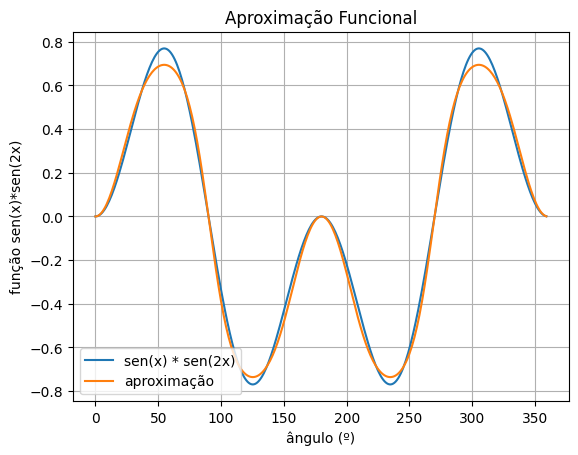

In [183]:
# Teste de aproximação funcional com a mesma função utilizada no treinamento 
aproximacao = []
for x in range(360):
    entrada_teste = func1(x)
    
    for vetor_teste in entrada_teste:
        sinal_saida = predict(vetor_teste)
        aproximacao.extend(sinal_saida)

treinamento = []
for x in range(360):
    treinamento += func1(x)

ax = plt.subplot()
ax.set(
    xlabel="ângulo (º)", ylabel="função sen(x)*sen(2x)", title="Aproximação Funcional"
)
ax.grid()
t = np.arange(0, 360, 1)

ax.plot(t, treinamento, label="sen(x) * sen(2x)")
ax.plot(t, aproximacao, label="aproximação")
plt.legend(loc='lower left')
plt.show()

In [ ]:
######################## f(x) = cos(x) * sen(2x) ######################## 

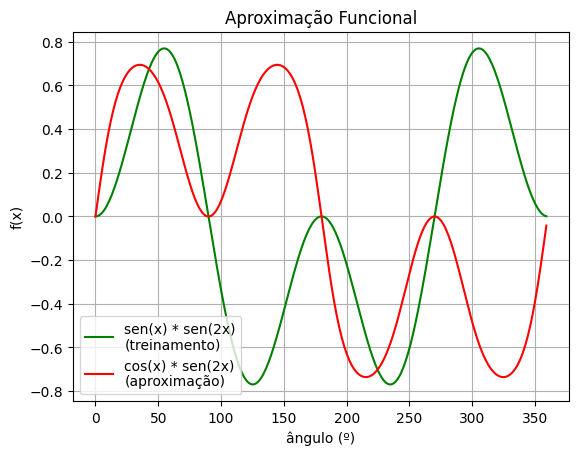

In [204]:
# Teste de aproximação funcional utilizando a função f(x) = cos(x) * sen(2x) 
aproximacao = []
for x in range(360):
    entrada_teste = func2(x)
    
    for vetor_teste in entrada_teste:
        sinal_saida = predict(vetor_teste)
        aproximacao.extend(sinal_saida)

treinamento = []
for x in range(360):
    treinamento += func1(x)

funcao_original = []
for x in range(360):
    funcao_original += func2(x)
    

ax = plt.subplot()
ax.set(
    xlabel="ângulo (º)", ylabel="f(x)", title="Aproximação Funcional"
)
ax.grid()
t = np.arange(0, 360, 1)


# Gráfico da nova função para comparar com o resultado da aproximação
# ax.plot(t, funcao_original, color="blue", label="cos(x) * sen(2x)")

ax.plot(t, treinamento, color="green", label="sen(x) * sen(2x)\n(treinamento)")
ax.plot(t, aproximacao, color="red", label="cos(x) * sen(2x)\n(aproximação)")
plt.legend(loc='lower left')
plt.show()

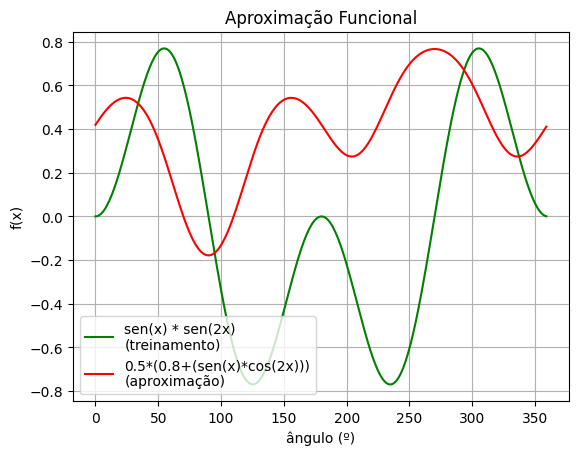

In [266]:
# Teste de aproximação funcional utilizando a função f(x) = 0.5 * (0.8 + (sen(x)*cos(2x))) 
aproximacao = []
for x in range(360):
    entrada_teste = func3(x)
    
    for vetor_teste in entrada_teste:
        sinal_saida = predict(vetor_teste)
        aproximacao.extend(sinal_saida)

treinamento = []
for x in range(360):
    treinamento += func1(x)

funcao_original = []
for x in range(360):
    funcao_original += func3(x)
    

ax = plt.subplot()
ax.set(
    xlabel="ângulo (º)", ylabel="f(x)", title="Aproximação Funcional"
)
ax.grid()
t = np.arange(0, 360, 1)


# Gráfico da nova função para comparar com o resultado da aproximação
# ax.plot(t, funcao_original, color="blue", label="cos(x) * sen(2x)")

ax.plot(t, treinamento, color="green", label="sen(x) * sen(2x)\n(treinamento)")
ax.plot(t, aproximacao, color="red", label="0.5*(0.8+(sen(x)*cos(2x)))\n(aproximação)")
plt.legend(loc='lower left')
plt.show()

In [ ]:
######################## f(x) = 0.5 * (0.8 + (sen(x)*cos(2x))) ######################## 

In [261]:
random.seed(0)

# Configurações
neuronios_entrada = 1
neuronios_intermediarios = 6
neuronios_saida = 1
alpha = 0.08
qtd_ciclos = 300

In [262]:
# Inicialização dos pesos
camada_oculta = [
    [random.random() for __ in range(neuronios_entrada + 1)]
    for __ in range(neuronios_intermediarios)
]

camada_saida = [
    [random.random() for __ in range(neuronios_intermediarios + 1)]
    for __ in range(neuronios_saida)
]

rede_neural = [camada_oculta, camada_saida]

In [263]:
print("camada intermediária\n", np.array(camada_oculta))
print("camada saída\n", np.array(camada_saida))

camada intermediária
 [[0.84442185 0.7579544 ]
 [0.42057158 0.25891675]
 [0.51127472 0.40493414]
 [0.78379859 0.30331273]
 [0.47659695 0.58338204]
 [0.90811289 0.50468686]]
camada saída
 [[0.28183784 0.7558042  0.618369   0.25050634 0.90974626 0.98278548
  0.81021724]]


In [264]:
# Aproximação funcional de f(x) = 0.5 * (0.8 + (sen(x)*cos(2x)))
# Treinamento
for __ in range(qtd_ciclos):
    for x in range(360):
        entrada = func3(x)
        saida_desejada = func3(x)
        for vetor_entrada, vetor_saida in zip(entrada, saida_desejada):
            backpropagation(rede_neural, vetor_entrada, vetor_saida, alpha)

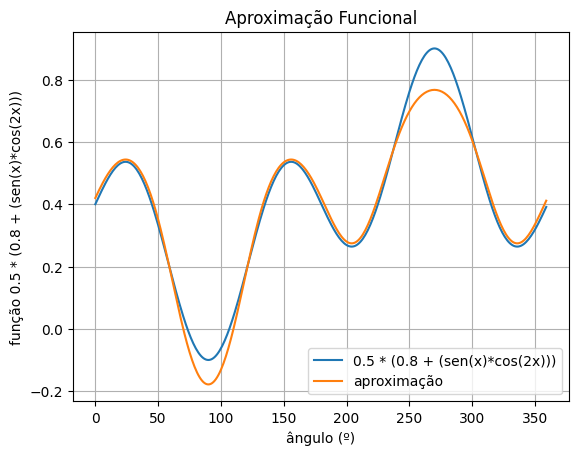

In [265]:
# Teste de aproximação funcional utilizando a função f(x) = 0.5 * (0.8 + (sen(x)*cos(2x)))
aproximacao = []
for x in range(360):
    entrada_teste = func3(x)
    
    for vetor_teste in entrada_teste:
        sinal_saida = predict(vetor_teste)
        aproximacao.extend(sinal_saida)

treinamento = []
for x in range(360):
    treinamento += func3(x)

ax = plt.subplot()
ax.set(
    xlabel="ângulo (º)", ylabel="função 0.5 * (0.8 + (sen(x)*cos(2x)))", title="Aproximação Funcional"
)
ax.grid()
t = np.arange(0, 360, 1)

ax.plot(t, treinamento, label="0.5 * (0.8 + (sen(x)*cos(2x)))")
ax.plot(t, aproximacao, label="aproximação")
plt.legend(loc='lower right')
plt.show()